# SI 370 - Homework #4: Machine Learning 1

In this homework exercise you will apply the machine learning techniques we've covered so far: linear regression,
machine learning pipelines, agglomerative clustering, k-means clustering, and t-SNE.

We will be using [graduate admissions data](https://www.kaggle.com/mohansacharya/graduate-admissions).

This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
# admit = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/Admission_Predict.csv',
#                     index_col="Serial No.")

In [5]:
admit = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/Admission_Predict.csv')

In [6]:
admit.shape

(500, 8)

In [7]:
admit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Task 1 (2 points):
Perform basic exploratory data analyses on the variables in this dataframe.  Your work should include both
numerical **and** graphical overviews of the data.  The `multiplePlots` code might be helpful here.

Numerical Exploration:

In [8]:
# Summary Statistics
admit.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The above cell gives the summary statistics for the admit dataset. To make a few key observations: GRE score has a relatively high standard distribution (11.29); Chance of Admit — a probability variable - has a mean value of 0.7217 (which is significantly higher than 0.50); and research — a binomial classifier column — is fairly balanced with a mean around 0.56. 

In [9]:
# Missing Values
admit.isna().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in this dataset.

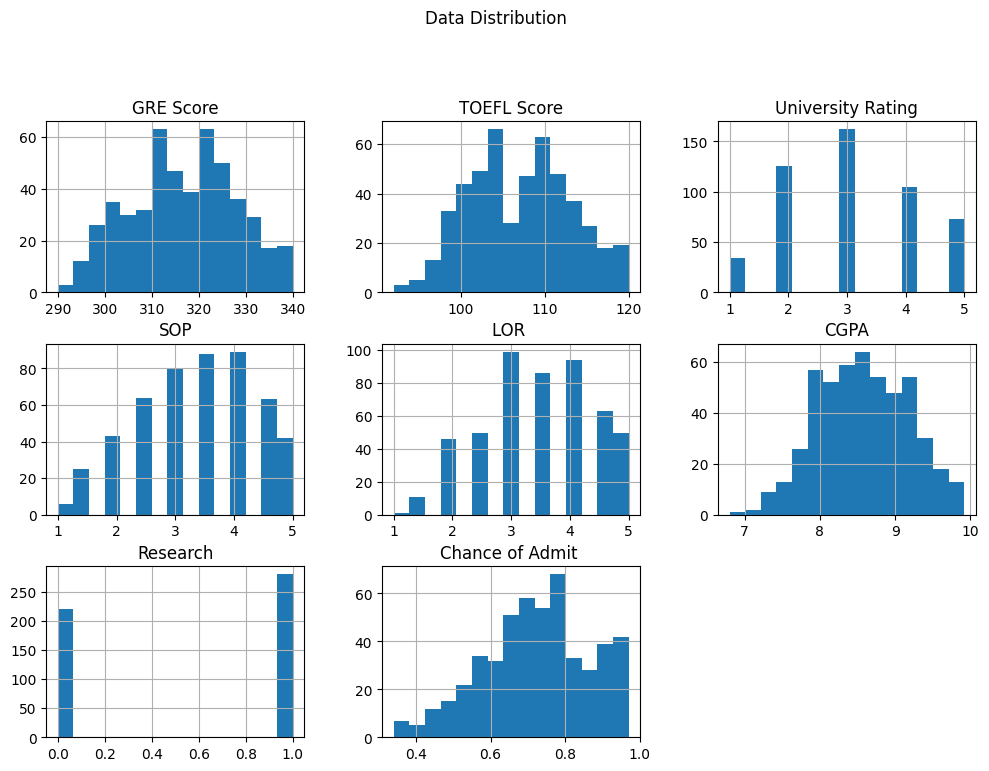

In [10]:
# Data distribution (histograms for all numerical columns)
admit.hist(bins=15, figsize=(12, 8))
plt.suptitle('Data Distribution', y=1.02)
plt.show()

The above cell gives a data distribution for the columns in the admit dataset. Making some key observations, I note that the following columns have a relatively normal distribution: CGPA and University Rating. TOEFL Score and GRE Score are slighly more binomial, however they still exhibit characteristics of a normal distribution. Chance of Admit, LOR, and SOP, however, all exhibit skewed left distributions.

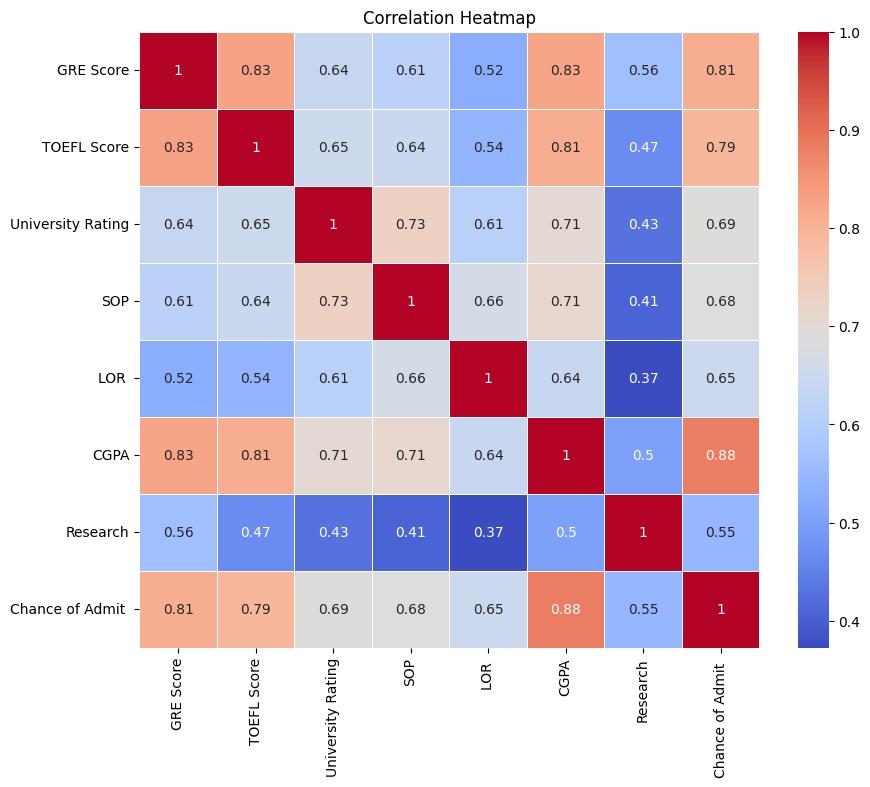

In [11]:
# Pairwise correlation (heatmap)
correlation_matrix = admit.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The above code cell gives a pairwise correlation heatmap for the variables in the admit dataset. I'll point out a few key observations here. The test scores — GRE Score, TOEFL Score — have a strong correlation to one another. Chance of Admit is also strongly correlated with these score values; it is also strongly correlated to CGPA. There is also a strong correlation between CGPA and TOEFL Score and GRE Score. In summary, the three variables — GRE Score, TOEFL Score, and CGPA — all exhibit strong correlations with Chance of Admit. 

Graphical Overview:

In [12]:
# sns.pairplot(admit)

Insert your code and answers here.

## Task 2a (4 points):
Use scikit-learn to conduct a linear regression that models the chance of admission based on the other variables.  Be sure to exclude "Serial No." as an explanatory variable.  Be sure to pre-process the data appropriately.  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
admit.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
# Preprocessing to normalize column names. Remove whitespace, capitals, and replace space with underscore.
admit.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)
admit.rename(columns={'LOR ': 'LOR'}, inplace=True)

In [16]:
admit.columns = admit.columns.str.replace(' ', '_').str.lower()

In [17]:
admit.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
target = "chance_of_admit"

X = admit.drop(columns=target)
y = admit[target]

seed = 100
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [32]:
# X_train

In [33]:
# y_train

Linear Regression Model:

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
lm = LinearRegression()

In [35]:
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = lm.predict(X_test)

In [37]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Root Mean Squared Error (RMSE): 0.0573


The above code cell gives us the RMSE for our LinearRegression model and its predicted values for "chance_of_admission"; as one can see, the RMSE associated with this model is 0.0573. This means — on average, the model's predictions are off by approximately 0.0573. Because our RMSE value is relatively low, we know that our model is fairly accurate at predicting the "chance_of_admission" values. 

## Task 2b (1 point):
Based on your work in the previous task, what is the probability of admission for someone with a GRE score or 325, a TOEFL score of 108, a university rating of 3, an statement of purpose score of 3.0, a letter of recommendation score of 3.5, a high-school grade point average of 8.9, and who has research experience.

In [44]:
admit.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [45]:
# Input features for the candidate
candidate_features = [325, 108, 3, 3.0, 3.5, 8.9, 1]  # GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research

# Reshape the input features as a NumPy array
candidate_features = np.array(candidate_features).reshape(1, -1)

# Use the model to predict the admission probability
probability_of_admission = lm.predict(candidate_features)

# Print the predicted probability
print(f"Predicted Probability of Admission: {probability_of_admission[0]:.4f}")


Predicted Probability of Admission: 0.7862


The above code cell takes our new test input — a GRE score or 325, a TOEFL score of 108, a university rating of 3, an statement of purpose score of 3.0, a letter of recommendation score of 3.5, a high-school grade point average of 8.9 - and uses our Linear Regression Model from the previous task in order to predict the "chance_of_admission". As one can see, the Linear Regression model — with these given test features — has predicted the "chance_of_admission" to be 0.7862. In other words, our model has predicted that an individual with these particular test features has roughly a 78.9% chance of admission.

Insert your code and answers here.

## Task 3 (1 points):
Decide on a reasonable value for a threshold for admission.  Pick a value that you would feel comfortable with if you wanted to know whether you were likely to be accepted into a graduate program.  Create a new variable called "admitted" that is set to 1 if the chance of admission value is equal to or greater than your chosen threshold, 0 otherwise.

In [48]:

threshold = 0.75

admit['admitted'] = admit['chance_of_admit'].apply(lambda x: 1 if x >= threshold else 0)

admit.head()


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In the above code cell, the column 'admitted' is created; this column is assigned to True (1) if the chance_of_admission is greater than or equal to the selected threshold (0.75) and False (0) otherwise. I chose 0.75 as the threshold for this classification because, personally, I would feel confident with my chances for admission if I knew my probability was 0.75 or greater. 

## Task 4 (5 points):
Using your **test** dataset (i.e. approximately 80 rows) from above, conduct an agglomerative clustering analysis using average linkage based on PCA projections of the original data onto 2 dimensions (remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first two principal components. 

Do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.

Create a dendrogram, pick an appropriate "cut line" and comment on the composition of each of the resulting clusters.  Comment on the degree to which the clusters correspond to admission probabilities (note: you may find it helpful to examine the values of "admitted").

Conduct an agglomerative clustering analysis using average linkage based on PCA projections of the original data onto 2 dimensions:

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('scale',StandardScaler()),

    ('pca', PCA(n_components=5,random_state=42)),
])

DENDOGRAM:

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    # Draw a horizontal line at our cutoff 
    color_threshold = kwargs.pop('color_threshold',None)
    plt.axhline(y=color_threshold,c='k')

plt.title('Hierarchical Clustering Dendrogram (People)')
plot_dendrogram(pipe.named_steps.agglomerative,labels=y.values,color_threshold=25)
plt.xticks(rotation=90)
# and save the figure to a PDF file
plt.savefig('dendrogram.pdf')

Insert your code and answers here.

## Task 5 (4 points):
Conduct a k-means clustering of the admissions data.  Pre-process the data using a 2-dimensional PCA (remember to scale your data before doing the PCA).  Again, do not use the chance of admission or the "admitted" variable you created earlier.  Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the optimal number of clusters.

Insert your code and answers here.

## Task 6 (3 points):
Show the results of a t-SNE analysis of the admissions data.  As before, do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.  Color the points in your visualization based on the "admitted" variable you created earlier.

Insert your code and answers here.